Kmeans clustering 
1. select value of k i.e. the number of cluster you want to identify in ur data
2. random select 3 distinct data point they are initial cluster
3. assign the points to the nearest cluster, measure the distances and assign the point to the neaest clusters 
4. calculate the mean of each cluster and 

1. decide n clusters
2. initialise the centroids
3. design the clusters
4. move the centroid
5. repeat above steps until the clusters do not change 



Elbow method is used to find the optimal value of K for the number of clusters 


Problem Statement : Implement K-Means clustering/ hierarchical clustering on
sales_data_sample.csv
dataset. Determine the number of clusters using the elbow
method.

In [1]:
import pandas as pd

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/Tanmay49/SEM7/main/ML/sales_data_sample.csv' ,encoding = "unicode_escape")

In [34]:
df.columns
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [35]:
df = df[['QUANTITYORDERED' , 'PRICEEACH' , 'SALES']]
df

,QUANTITYORDERED,PRICEEACH,SALES
0,30,95.70,2871.00
1,34,81.35,2765.90
2,41,94.74,3884.34
3,45,83.26,3746.70
4,49,100.00,5205.27
...,...,...,...
2818,20,100.00,2244.40
2819,29,100.00,3978.51
2820,43,100.00,5417.57
2821,34,62.24,2116.16


In [36]:
from sklearn.cluster import KMeans

intertia = []  

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    intertia.append(kmeans.inertia_)


intertia

[9574958418.900711,
 3322528695.919863,
 1729706640.6035037,
 1040556635.2542539,
 715162927.8934009,
 512084962.6237122,
 393465878.32580936,
 311075200.01732755,
 240096920.43777117,
 188764036.3553367,
 165645162.41910267,
 131872235.33343875,
 112424638.7064977,
 107154388.94716458,
 96812781.5673449,
 81724620.33652464,
 70564034.05470528,
 64761454.021363124,
 57423146.89898724]

<Axes: >

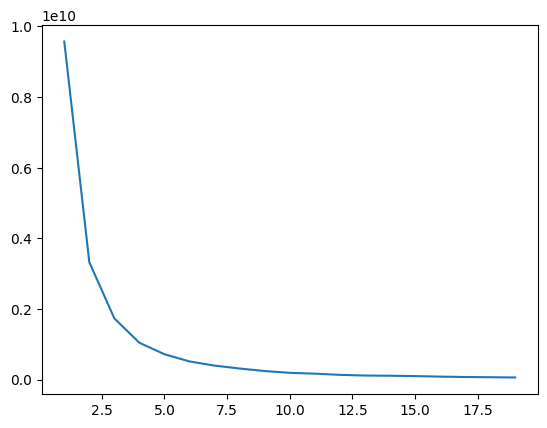

In [38]:
import seaborn as sns
sns.lineplot(x=range(1,20) , y=intertia )

In [12]:
# 4 clusters is optimal according to elbow method

kmeans = KMeans(n_clusters=4)
df['Cluster']  = kmeans.fit_predict(df)

In [31]:
df.head(30)

,QUANTITYORDERED,PRICEEACH,SALES,Cluster
0,30,95.70,2871.00,0
1,34,81.35,2765.90,0
2,41,94.74,3884.34,0
3,45,83.26,3746.70,0
4,49,100.00,5205.27,1
5,36,96.66,3479.76,0
6,29,86.13,2497.77,3
7,48,100.00,5512.32,1
8,22,98.57,2168.54,3
9,41,100.00,4708.44,1


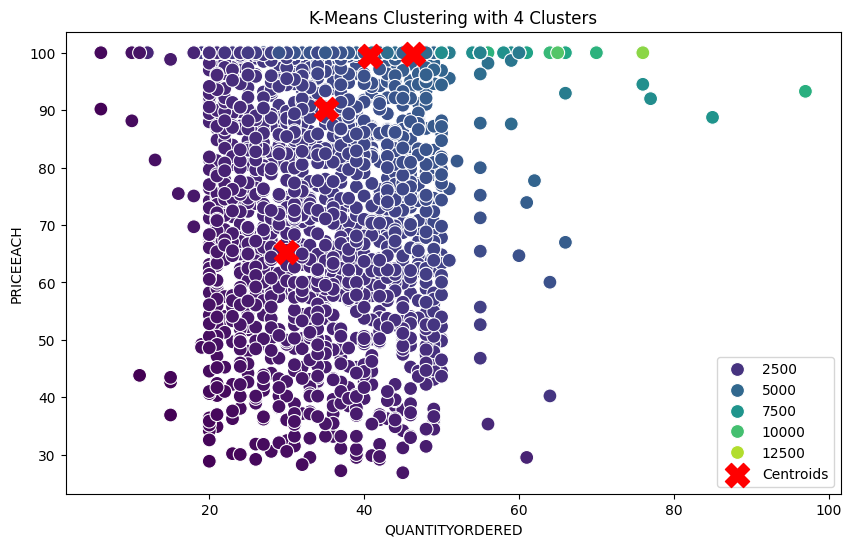

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='QUANTITYORDERED', y='PRICEEACH', hue='SALES', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering with 4 Clusters")
plt.legend()
plt.show()